# Table of Contents
 <p><div class="lev1"><a href="#Intro-to-psychometric-function-fitting"><span class="toc-item-num">1&nbsp;&nbsp;</span>Intro to psychometric function fitting</a></div><div class="lev2"><a href="#The-psychometric-function-$\psi$"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>The psychometric function <span class="MathJax_Preview" style="color: inherit;"><span class="MJXp-math" id="MJXp-Span-1"><span class="MJXp-mi MJXp-italic" id="MJXp-Span-2">ψ</span></span></span><script type="math/tex" id="MathJax-Element-1">\psi</script></a></div><div class="lev2"><a href="#Fitting-a-psychometric-function-to-data:-introduction"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Fitting a psychometric function to data: introduction</a></div><div class="lev2"><a href="#The-psychometric-function-as-a-statistical-model"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>The psychometric function as a statistical model</a></div><div class="lev2"><a href="#Maximum-likelihood-estimation-of-the-psychometric-function"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Maximum-likelihood estimation of the psychometric function</a></div><div class="lev2"><a href="#Maximum-likelihood-fitting-using-Pypsignifit"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Maximum-likelihood fitting using Pypsignifit</a></div><div class="lev2"><a href="#Goodness-of-fit-assessment"><span class="toc-item-num">1.6&nbsp;&nbsp;</span>Goodness-of-fit assessment</a></div><div class="lev2"><a href="#Obtaining-confidence-intervals"><span class="toc-item-num">1.7&nbsp;&nbsp;</span>Obtaining confidence intervals</a></div><div class="lev1"><a href="#Analysis-Orientation-task"><span class="toc-item-num">2&nbsp;&nbsp;</span>Analysis Orientation task</a></div>

In [1]:
#Import required modules
from __future__ import division, print_function
from numpy import *
from scipy.stats import norm
from scipy.stats import binom
import pypsignifit as pypsi
import pypsignifit.psigobservers as sim_obs
import pypsignifit.psigniplot as psiplot

import scipy.io as sio
from scipy import stats
from psychopy import data, core, gui, misc
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_context("poster")

%pylab inline
sns.set(style="whitegrid",font_scale=1.5, color_codes=True)

/usr/local/lib/python2.7/dist-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python2.7/dist-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['norm']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


# Intro to psychometric function fitting
**Tutorial by Nathalie Van Humbeeck & Tom Putzeys**

## The psychometric function $\psi$

$$\psi = \gamma + (1-\gamma-\lambda)F(x;\alpha,\beta)$$

where

$F$ is a function of stimulus intensity $x$. It determines the functional form (shape) of the psychometric function. We will use a cumulative gaussian with mean $\alpha$ and standard deviation $\beta$.

$\gamma$ is the guess rate, fixed at 0.5 for 2-AFC experiments. 

$\lambda$ specifies the lapse rate, i.e., stimulus independent errors.

In [3]:
#Define the psychometric function
def psi(x, alpha, beta, lam): return 0.5+(1-0.5-lam) * stats.norm.cdf(x,alpha,beta)

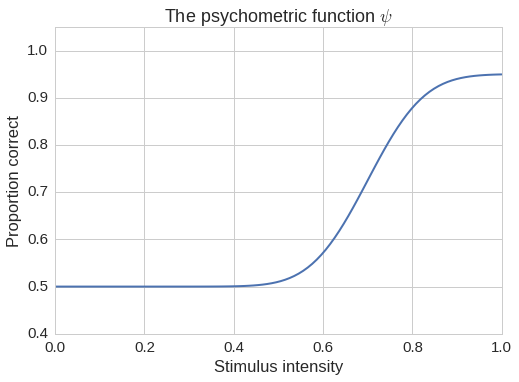

In [46]:
x_axis = linspace(0,1,100)  #vector of stimulus intensities (0 is minimum, 1 is maximum)

plt.axis((0, 1, 0.4, 1.05)); 
plt.title('The psychometric function $\psi$');
plt.xlabel('Stimulus intensity');
plt.ylabel('Proportion correct');

#Plot a psychometric function with parameters alpha, beta, lambda
plot(x_axis,psi(x_axis,0.7,0.1,0.05),linewidth=2);


## Fitting a psychometric function to data: introduction

Suppose you have a set of data: proportion correct as a function of stimulus intensity.

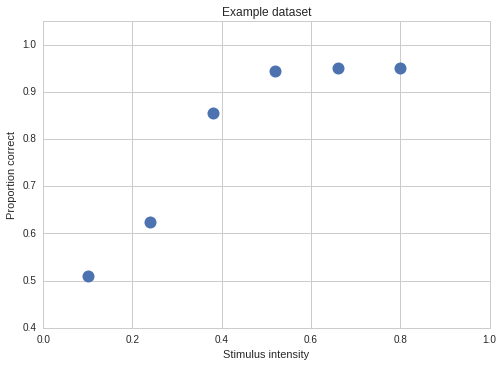

In [28]:
x_levels = linspace(0.1,0.8,6);
perf_data = psi(x_levels, 0.3,0.1,0.05);
plot(x_levels, perf_data,'bo',markersize=12)
plt.axis((0, 1, 0.4, 1.05));

plt.title('Example dataset');
plt.xlabel('Stimulus intensity');
plt.ylabel('Proportion correct');


We want a psychometric function that provides a "good" description of these data. This function will provide useful descriptive measures such as the stimulus intensity corresponding to the 75% correct performance threshold, as well as the rate of increase in performance with increasing stimulus intensity.

But what constitutes a "good" description of the data?

For the example dataset above, it is straightforward. The following psychometric function provides a bad fit:

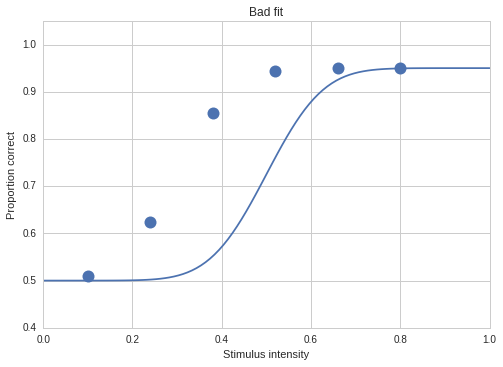

In [30]:
x_levels = linspace(0.1,0.8,6);
perf_data = psi(x_levels, 0.3,0.1,0.05);
plot(x_levels, perf_data,'bo',markersize=12)
plt.axis((0, 1, 0.4, 1.05));

psychometric_function = psi(x_axis, 0.5,0.1,0.05)

plot(x_axis, psychometric_function)

plt.title('Bad fit');
plt.xlabel('Stimulus intensity');
plt.ylabel('Proportion correct');

The $\alpha$ parameter of the psychometric function is too high (0.5). Let's lower it to 0.3:

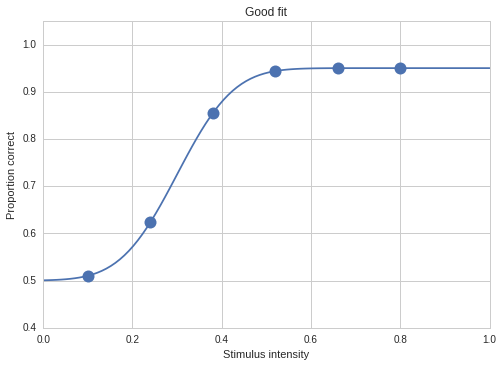

In [31]:
x_levels = linspace(0.1,0.8,6);
perf_data = psi(x_levels, 0.3,0.1,0.05);
plot(x_levels, perf_data,'bo',markersize=12)
plt.axis((0, 1, 0.4, 1.05));

psychometric_function = psi(x_axis, 0.3,0.1,0.05)

plot(x_axis, psychometric_function)

plt.title('Good fit');
plt.xlabel('Stimulus intensity');
plt.ylabel('Proportion correct');

It is clear that this fit is good. All data points fall on the psychometric function.

Of course, this example is unrealistic, as the example data set does not contain any noise or variability. All real-life datasets are noisy. 

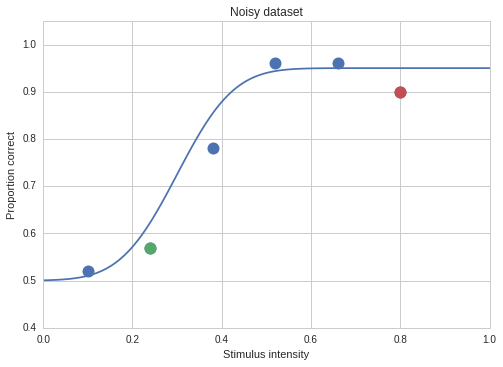

In [32]:
x_levels = linspace(0.1,0.8,6);
perf_data = [0.52,  0.57,  0.78,  0.96,  0.96,  0.90]
plot(x_levels, perf_data,'bo',markersize=12)
plot(x_levels[1], perf_data[1],'go',markersize=12)
plot(x_levels[5], perf_data[5],'ro',markersize=12)
plt.axis((0, 1, 0.4, 1.05));

psychometric_function = psi(x_axis, 0.3,0.1,0.05)

plot(x_axis, psychometric_function)

plt.title('Noisy dataset');
plt.xlabel('Stimulus intensity');
plt.ylabel('Proportion correct');



The red and green data points deviate from the psychometric function. But should this deviation be considered large? Does this psychometric function provide a "bad" fit to the data?

It should be clear that fitting psychometric functions to data is more than drawing a line through a number of data points. The data will always deviate from the psychometric function. These deviations are to be expected due to noise and do not necessarily mean that the psychometric function provides a bad description of the data.

We need a currency to assess the "badness" of deviations from the psychometric function.

The psychometric function, as a statistical model, provides this currency. The psychometric function should not be considered as a mere sigmoidal curve. It is a statistical model.

## The psychometric function as a statistical model

The psychometric function, when considered as a model, provides a prediction about behaviour in psychophysical experiments. 

It specifies the performance (as a proportion correct) that can be expected in a 2-AFC experiment when presenting a stimulus of a specific intensity. 


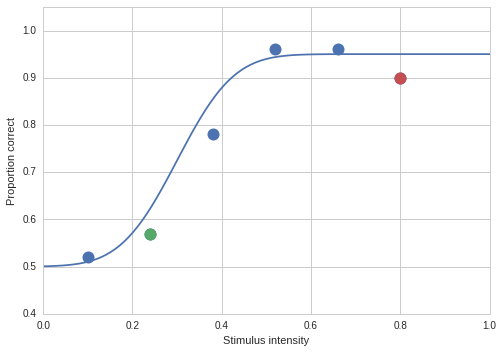

In [36]:
x_levels = linspace(0.1,0.8,6);
perf_data = [0.52,  0.57,  0.78,  0.96,  0.96,  0.90]
plot(x_levels, perf_data,'bo',markersize=12)
plot(x_levels[1], perf_data[1],'go',markersize=12)
plot(x_levels[5], perf_data[5],'ro',markersize=12)
plt.axis((0, 1, 0.4, 1.05));

psychometric_function = psi(x_axis, 0.3,0.1,0.05)

plot(x_axis, psychometric_function)

plt.xlabel('Stimulus intensity');
plt.ylabel('Proportion correct');


In [40]:
%%latex 
\usepackage{amsmath}

<IPython.core.display.Latex object>

Here, we can see that a performance of 95% correct is predicted by the blue psychometric function when a stimulus of 0.8 intensity is shown.

You could say that the predicted performance will be observed "on average", or when the data do not contain noise. Indeed: the blue curve represents the deterministic component of the psychometric function model. 

Importantly, the psychometric function model also contains a stochastic component. Because of this fact, the blue sigmoidal curve only tells one part of the story. The stochastic part of the model allows to capture deviations from the blue curve due to noise. 

More specifically, the model assumes that individual responses in the 2-AFC task are the result of Bernoulli processes. The outcome of such a process is either 0 (incorrect) or 1 (correct) and there is an underlying probability $p$ to get the correct response.


Consequently, in a block of $n$ trials at the same stimulus intensity $x$, the total number of correct answers in the block, $z$, follows a binomial distribution:
$$f(z) = {{n}\choose{z}} p^z(1-p)^{n-z}$$


If we substitute the proportion correct, $y=\frac{z}{n}$, we get:
$$f(y|p,n)={\binom{n}{ny}}p^{ny}(1-p)^{n(1-y)}$$

This is a valuable function, for it provides the probability of observing a specific proportion correct in a block of $n$ trials given a success probability $p$. 

The success probability $p$ is provided by the psychometric function (the blue curve): when presenting a stimulus of 0.8 intensity, we predict a proportion correct of 0.95. The success probability $p$ is 0.95.

Now, suppose we run a block of 100 trials. The above function $f(y|p,n)$ allows us to evaluate the probability of observing a specific data point ($y$), given that $n=100$ and $p=0.95$ (based on the psychometric function).



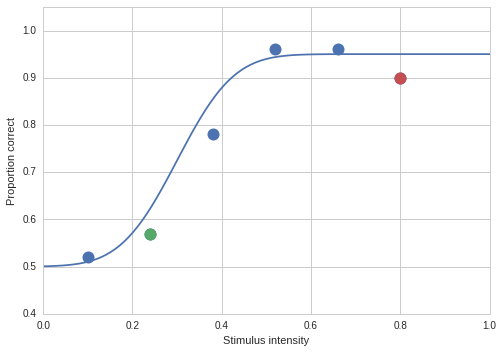

In [41]:
x_levels = linspace(0.1,0.8,6);
perf_data = [0.52,  0.57,  0.78,  0.96,  0.96,  0.90]
plot(x_levels, perf_data,'bo',markersize=12)
plot(x_levels[1], perf_data[1],'go',markersize=12)
plot(x_levels[5], perf_data[5],'ro',markersize=12)
plt.axis((0, 1, 0.4, 1.05));

psychometric_function = psi(x_axis, 0.3,0.1,0.05)

plot(x_axis, psychometric_function)

plt.xlabel('Stimulus intensity');
plt.ylabel('Proportion correct');


We now have a currency to assess deviations from the psychometric function. In the case of the red data point, the psychometric function provides a success probability of 0.95. Assuming 100 trials, we can now assess the probability of observing the red data point, i.e., a proportion correct of 0.9 instead of the expected 0.95. 

To illustrate this, we will simulate new data based on the psychometric function model, that is, based on the blue curve (the deterministic part of the model) as well as the assumption of the binomial process underlying the data (the stochastic part of the model).

This is called a Monte-Carlo simulation or parametric bootstrap.

We simulate data obtained in a 2-AFC experiment consisting of a single block of 100 trials at stimulus intensity 0.8. The deterministic part of the model specifies a success probability $p=0.95$

We use a binomial random number generator, setting the success probability $p=0.95$ and number of trials $n=100$ to simulate 100 replications of the experiment. We obtain 100 "datasets", i.e., 100 numbers. Each number is the proportion correct of one replication of the experiment. 

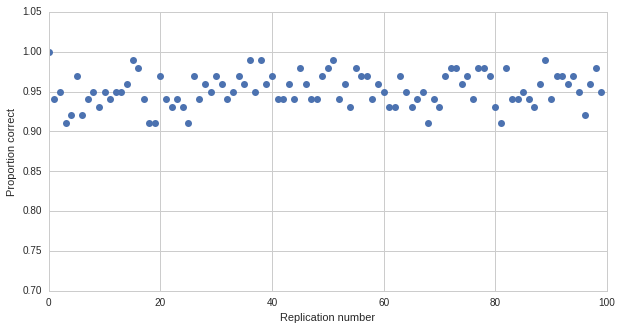

In [42]:
figure(figsize=(10,5))

nr_trials = 100;
success_probability = 0.95;
nr_of_replications = 100;

random_counts = random.binomial(nr_trials,success_probability,nr_of_replications)/nr_trials;
plot(random_counts,'bo');
plt.axis((0, len(random_counts), 0.7, 1.05));
plt.xlabel('Replication number');
plt.ylabel('Proportion correct');

You'll notice that, on average, proportion correct is indeed the 0.95 predicted by the deterministic part of the model. However, there is noise due to the binomial process and the limited amount of trials. This source of variability is incorporated in the model. Deviations from the expected 0.95 due to this variability should not be considered as a failure of the model or a "bad fit".

Now, let's reconsider our example dataset:

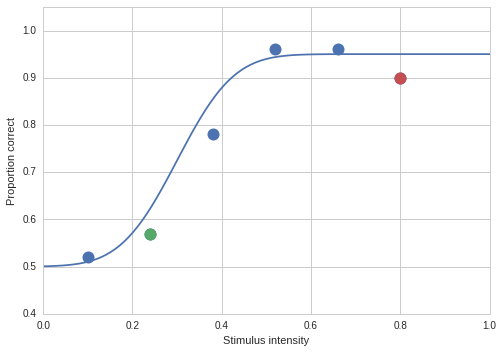

In [43]:
x_levels = linspace(0.1,0.8,6);
perf_data = [0.52,  0.57,  0.78,  0.96,  0.96,  0.90]
plot(x_levels, perf_data,'bo',markersize=12)
plot(x_levels[1], perf_data[1],'go',markersize=12)
plot(x_levels[5], perf_data[5],'ro',markersize=12)
plt.axis((0, 1, 0.4, 1.05));

psychometric_function = psi(x_axis, 0.3,0.1,0.05)

plot(x_axis, psychometric_function)

plt.xlabel('Stimulus intensity');
plt.ylabel('Proportion correct');


What about the red datapoint? We expected a proportion correct of 0.95 but observed 0.90. Should we label this deviation as "bad"? And what about the green point: 0.57 proportion correct is observed where 0.62 is expected?

To answer these questions, we perform a Monte-Carlo simulation of 1000 replications:

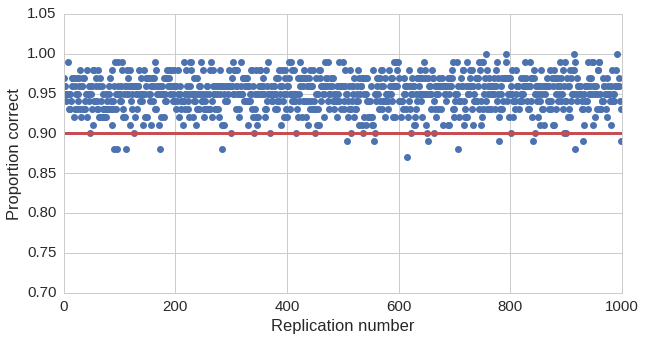

In [47]:

figure(figsize=(10,5))

nr_trials = 100;
success_probability = 0.95;
nr_of_replications = 1000;

random_counts = random.binomial(nr_trials,success_probability,nr_of_replications)/nr_trials;
plot(random_counts,'bo');

plt.axis((0, len(random_counts), 0.7, 1.05));
plt.xlabel('Replication number');
plt.ylabel('Proportion correct');

plot([0, 1000],[0.90,0.90], 'r-',linewidth= 3);


You can see that a proportion of 0.90 is unlikely when assuming that the psychometric function model is correct or "true".

For the green datapoint, on the other hand:

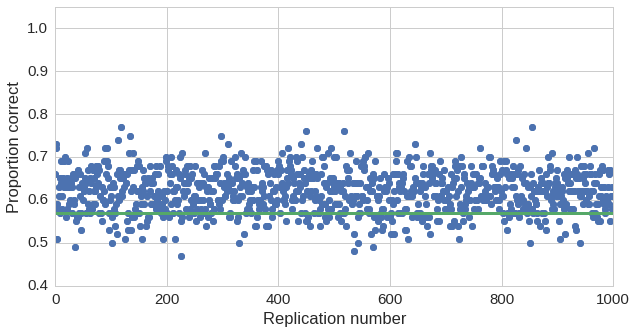

In [48]:
figure(figsize=(10,5))

nr_trials = 100;
success_probability = 0.62;
nr_of_replications = 1000;

random_counts = random.binomial(nr_trials,success_probability,nr_of_replications)/nr_trials;
plot(random_counts,'bo');

plot(random_counts,'bo');
plt.axis((0, len(random_counts), 0.4, 1.05));
plt.xlabel('Replication number');
plt.ylabel('Proportion correct');

plot([0, 1000],[0.57,0.57], 'g-',linewidth= 3);


The observed proportion correct of 0.57 should not be considered extreme. Assuming the model is correct, even lower values of proportion correct are to be expected due to binomial variablity. 

Interestingly, both the red and green datapoint deviate 0.05 from the prediction but only the deviation of the red data point should be considered large. 

The reason for the difference between the prediction at 0.62 and 0.95 is the fact that the variance of the binomial distribution depends on the success probability: the variance is maximal at $p=0.5$ and minimal at $p=1$:
$$\sigma^2=np(1-p)$$

A larger variability, and consequently, deviation, is expected for the green data point.

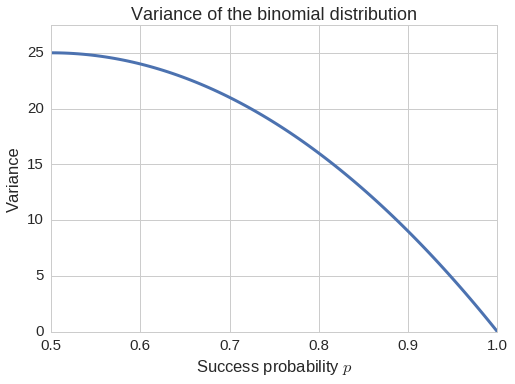

In [49]:
p_range = linspace(0.5,1,100)
nr_of_trials = 100
pred_var = nr_of_trials * p_range*(1-p_range)
plot(p_range, pred_var, linewidth=3)
plt.axis((0.5, 1, min(pred_var), max(pred_var)*1.1));
plt.title('Variance of the binomial distribution');
plt.xlabel('Success probability $p$');
plt.ylabel('Variance');



We can also explore the effect of the amount of trials. Suppose we simulate an experiment of 25 trials per block at a stimulus intensity of 0.25 (predicted prop. correct = 0.62). We can expect a lot of noise due to the low amount of trials:

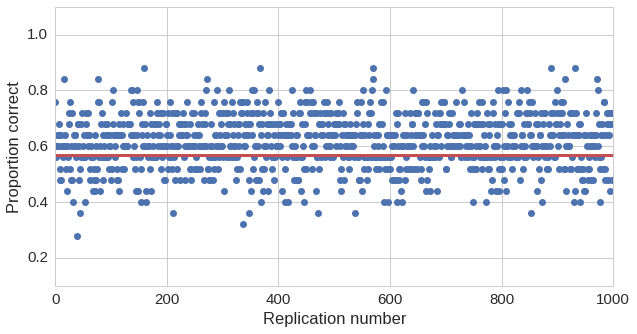

In [50]:
figure(figsize=(10,5))

nr_trials = 25;
success_probability = 0.62;
nr_of_replications = 1000;

random_counts=random.binomial(nr_trials,success_probability,nr_of_replications)/nr_trials;
plot(random_counts,'bo');

plt.axis((0, len(random_counts), 0.1, 1.1));
plt.xlabel('Replication number');
plt.ylabel('Proportion correct');

plot([0, 1000],[0.57,0.57], 'r-',linewidth= 3);



And now 1000 trials:

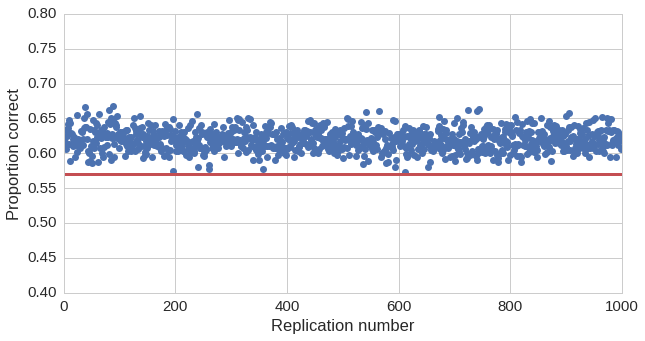

In [51]:
figure(figsize=(10,5))

nr_trials = 1000;
success_probability = 0.62;
nr_of_replications = 1000;

random_counts=random.binomial(nr_trials,success_probability,nr_of_replications)/nr_trials;
plot(random_counts,'bo');

plt.axis((0, len(random_counts), 0.4, 0.8));
plt.xlabel('Replication number');
plt.ylabel('Proportion correct');

plot([0, 1000],[0.57,0.57], 'r-',linewidth= 3);



Conclusion: when assuming 1000 trials, the observed proportion correct of 0.57 falls outside of the expected range but not when assuming 25 trials.

We can say: assuming 1000 trials: the probability of observing 0.57 is really low, or alternatively, that the likelihood of the psychometric function model being "true" is low.

## Maximum-likelihood estimation of the psychometric function

The disadvantage of the function $f(y|p,n)$ is that it provides the probability of observing data (proportion correct) given a success probability derived from the psychometric function. In practice, of course, we don't know the true psychometric function and we do not need the probability of data because we already observed the data in our experiments. 

We want to use the data to obtain the most likely psychometric function. What we need is the likelihood of the psychometric function being true, given a number of trials and given the data. This likelihood can be obtained using Bayes' theorem. 

$$L(p|y,n) = \frac{f(y|p,n)P(p,n)}{P(y,n)}$$

Assuming the priors are flat, we can replace them by constants, giving:

$$L(p|y,n) \propto f(y|p,n)$$

The likelihood of the psychometric function given the observed data is proportional to the probability of observing the data assuming a specific psychometric function. Proportionality is ok, as we want to find the psychometric function that is maximally likely. The exact value of the maximum is not important. 

To simplify mathematical operations and to avoid small numbers, typically the log of the likelihood is used.

Ignoring the proportionality constant, we get:

$$LL(p|y,n) = y*n*log(p)+(1-y)*n*log(1-p)$$

where y is the proportion correct of a single trial block consisting of $n$ trials. If an experiment constists of multiple trial blocks, the LL values for each individual trial block can simply be summed.

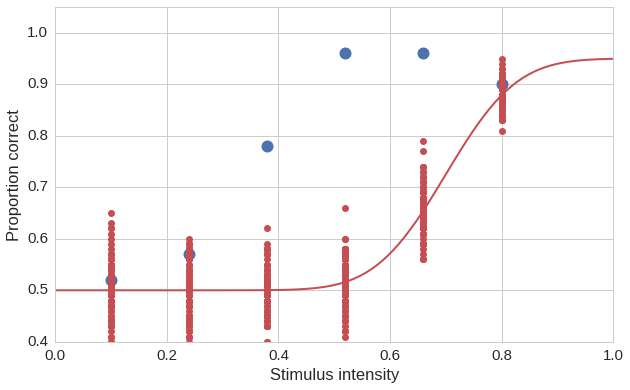

In [52]:
#Here we'll use the built-in pypsignifit functions to simulate data

nr_trials = 100;

#Parameters defining the red psychometric function
alpha = 0.7
beta = 0.1
lam = 0.05

#Define a theoretical observer
#The responses of this observer are governed by the red psychometric function 
#(parameters alpha, beta, lam) and a binomial process 
model ={"sigmoid" : "gauss", "core" : "ab", "nafc" : 2} #see psignifit3 website for more information

simulated_observer = sim_obs.Observer(alpha, beta, lam, **model)

#Define the stimulus intensities
x_levels = linspace(0.1,0.8,6);

#The observed data (prop correct)
perf_data = [0.52,  0.57,  0.78,  0.96,  0.96,  0.90]

#Proportion correct predicted by the psychometric function
pred_data = psi(x_levels, alpha, beta, lam)

#Plot observed data (blue dots)
figure(figsize=(10,6))
plot(x_levels, perf_data,'bo',markersize=12);

plt.xlabel('Stimulus intensity');
plt.ylabel('Proportion correct');
plt.axis((0, 1, 0.4, 1.05));

#Simulate data sets using the psychometric function as a generating function
for x in range(0, 100):
    data = simulated_observer.DoAnExperiment(x_levels, ntrials=nr_trials)
    data = numpy.array(data)
    sim_perf = data[:,1]/nr_trials
    plot(x_levels,sim_perf,'ro');

#Plot simulated data (red dots)    
plot(x_axis, psi(x_axis, alpha, beta, lam),'r-',linewidth=2);

The likelihood of the red psychometric function given the blue data and an amount of trials equal to 100 is low:

In [55]:
perf_data = array(perf_data)
LL = sum(perf_data * nr_trials * log(pred_data) + (1-perf_data) * nr_trials * log (1-pred_data))
print(LL)

-375.132073384


This is not surprising. If we perform a Monte-Carlo simulation starting from the red psychometric function we generate data sets that differ considerably from the observed data.

Now let's vary the alpha parameter systematically to find the maximum likelihood.

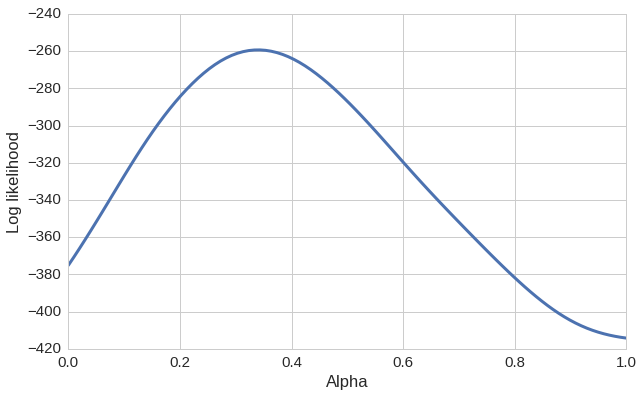

In [58]:
figure(figsize=(10,6))
plt.xlabel('Alpha');
plt.ylabel('Log likelihood');
alpha_range = linspace(0,1,100)
LL_vector = zeros(shape=(100,1));
for index, alpha in enumerate(alpha_range):
    pred_data = psi(x_levels, alpha, beta, lam)
    LL_vector[index] = sum(perf_data * nr_trials * log(pred_data) + (1-perf_data) * nr_trials * log (1-pred_data))
plot(alpha_range, LL_vector,linewidth=3);


In [59]:
#Find alpha resulting in a maximal LL value
print(alpha_range[argmax(LL_vector)])

0.343434343434


Now let's take a look at the maximum-likelihood psychometric function:

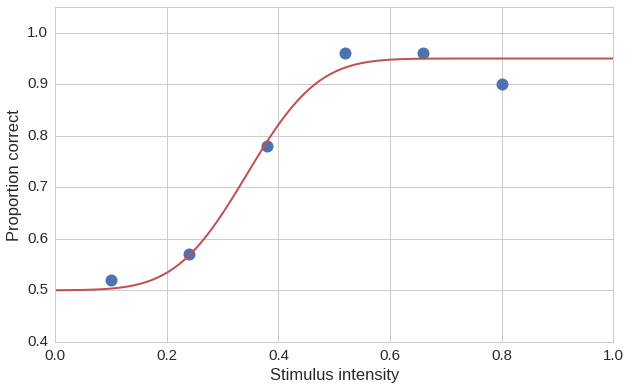

In [60]:
figure(figsize=(10,6))
plt.xlabel('Stimulus intensity');
plt.ylabel('Proportion correct');
plt.axis((0, 1, 0.4, 1.05));

plot(x_levels, perf_data,'bo',markersize=12);
plot(x_axis, psi(x_axis, alpha_range[argmax(LL_vector)], beta, lam),'r-',linewidth=2);

## Maximum-likelihood fitting using Pypsignifit

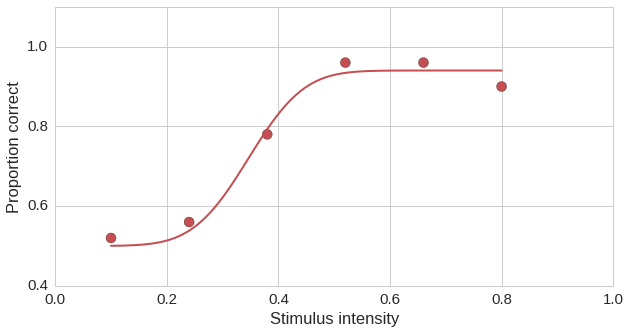

In [61]:
#Specify the data
nr_trials = 100
x = linspace(0.1,0.8,6) 
z = [0.52,  0.57,  0.78,  0.96,  0.96,  0.90]*nr_trials; #number of correct answers in a block (z) for a given x value
n = tile(nr_trials,size(z))

#Run the psignifit command for a maximum-likelihood analysis 
#We use a cumulative Gaussian shape and a linear core
#We use a flat prior for alpha and beta
#For lambda, a uniform prior is used ranging from 0 to 0.1. 
#Typically, datasets requiring lambda > 0.1 signal a problem with the experiment or the participant
results = pypsi.BootstrapInference ( zip(x,z,n),sigmoid="gauss", core = 'ab', \
                                    priors=("flat","flat","Uniform(0,0.1)"), sample=True, cuts=(0.25,0.5,0.75) )

#Plot the best-fitting psychometric function resulting from the maximum-likelihood analysis
figure(figsize=(10,5))
psiplot.plotPMF(results, color='r', linewidth=2)
plt.axis((0, 1, 0.4, 1.1));
plt.xlabel('Stimulus intensity')
plt.ylabel('Proportion correct');


The estimated parameters (alpha, beta, lambda) can be accessed as follows:

In [62]:
print(results.estimate)

[ 0.34650298  0.07835034  0.05987046]


The performance thresholds and slopes at approximately 75% correct level:

In [64]:
print(results.getThres(0.5))

0.34650297619


In [66]:
print(results.getSlope(0.5))

5.0917747097


Note that the threshold or slope at the 0.5 level means the level halfway between the minimum (guess rate) and the maximum level (1-lambda), which corresponds to 75% correct when lambda would be zero.

## Goodness-of-fit assessment

Before we can consider other statistics psignifit has to offer, we have to make sure that the best-fitting psychometric function (that is, the function with parameters for which the likelihood is maximal) provides a "good fit" to the data. The fact that we found the best-fitting function does not guarantee that the fit is good. 

If the fit is not good, the parameter estimates cannot be trusted and should not be used. Also, other statistics such as confidence intervals will not be reliable. 

The deviance measure is used in psignifit to assess goodness-of-fit. It is the log ratio of the likelihood of the saturated model and the likelihood of the best-fitting psychometric function under consideration: 

$D = 2*[LL(p_{sat}|y,n)-LL(p|y,n)]$

The saturated model is simply a model that predicts the data perfectly:

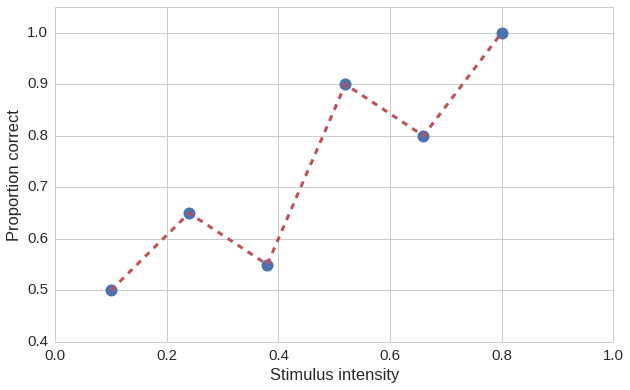

In [67]:
figure(figsize=(10,6))
plt.xlabel('Stimulus intensity');
plt.ylabel('Proportion correct');
plt.axis((0, 1, 0.4, 1.05));

perf_data = [0.5,  0.65,  0.55,  0.9,  0.8,  1]

plot(x_levels, perf_data,'bo',markersize=12);
plot(x_levels, perf_data,'r--',linewidth=3);

Of course, this saturated model is highly complex: it contains an amount of free parameters equal to the number of data points. As such, the saturated model is an unrealistic model of a psychophysical or psychological process. Imagine a psychological mechanism in the brain that responds in a discrete, unique way to each individual stimulus intensity. Although not impossible, such a mechanism is unlikely. A more plausible assumption is that the irregular pattern displayed by the blue data points is the result of noise. 

Nevertheless, the saturated model provides a good benchmark: it provides the likelihood of a model that predicts the data perfectly.

If we now calculate the ratio of the likelihood between this model and a psychometric function model, this ratio provides a goodness of fit measure. If the fit of the psychometric function is bad compared to the saturated model, the likelihood of the psychometric function model will be lower than the likelihood of the saturated model. This means that the likelihood ratio will deviate considerably from one, and the log likelihood ratio will deviate from zero.


The deviance of the best-fitting psychometric function is 2.43267311052


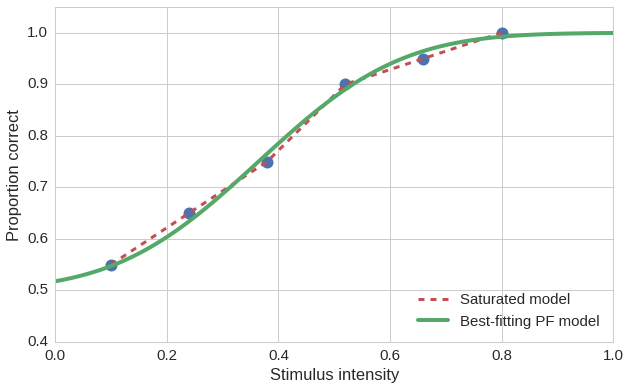

In [68]:
figure(figsize=(10,6))
plt.xlabel('Stimulus intensity');
plt.ylabel('Proportion correct');
plt.axis((0, 1, 0.4, 1.05));

perf_data = [0.55,  0.65,  0.75,  0.9,  0.95,  1]

plot(x_levels, perf_data,'bo',markersize=12);
plot(x_levels, perf_data,'r--',linewidth=3, label = "Saturated model");


x = linspace(0.1,0.8,6)
z = multiply(perf_data,nr_trials)
n = tile(nr_trials,len(z))

results = pypsi.BootstrapInference ( zip(x,z,n), sigmoid = "gauss", core = "ab", priors=("flat","flat","Uniform(0,0.1)"), sample=False)
param_vector = results.estimate
alpha = param_vector[0]
beta = param_vector[1]
lam = param_vector[2]

plot(x_axis, psi(x_axis, alpha, beta, lam),'g-',linewidth=4, label = "Best-fitting PF model");

legend(loc="lower right");

print "The deviance of the best-fitting psychometric function is " + str(results.deviance)

The deviance of the best-fitting psychometric function is 33.0101987874


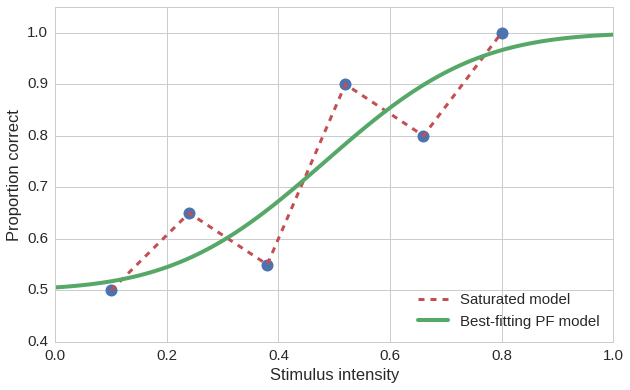

In [69]:
figure(figsize=(10,6))
plt.xlabel('Stimulus intensity');
plt.ylabel('Proportion correct');
plt.axis((0, 1, 0.4, 1.05));

perf_data = [0.5,  0.65,  0.55,  0.9,  0.8,  1]

plot(x_levels, perf_data,'bo',markersize=12);
plot(x_levels, perf_data,'r--',linewidth=3, label = "Saturated model");


x = linspace(0.1,0.8,6)
perf_data = [0.5,  0.65,  0.55,  0.9,  0.8,  1]
z = multiply(perf_data,nr_trials)
n = tile(nr_trials,len(z))

results = pypsi.BootstrapInference ( zip(x,z,n), sigmoid = "gauss", core = "ab", priors=("flat","flat","Uniform(0,0.1)"), sample=False)
param_vector = results.estimate
alpha = param_vector[0]
beta = param_vector[1]
lam = param_vector[2]

plot(x_axis, psi(x_axis, alpha, beta, lam),'g-',linewidth=4, label = "Best-fitting PF model");

legend(loc="lower right");

print "The deviance of the best-fitting psychometric function is " + str(results.deviance)



In the above plot, both the saturated model and the best-fitting psychometric function model are shown. 

The deviance of the best-fitting psychometric function is computed by psignifit and available in results.deviance

The PF model is much simpler than the saturated model. It only requires 3 free parameters: alpha, beta, lambda. In terms of the underlying psychological mechanism, it is more plausible than the saturated model. You can imagine a psychological or neural mechanism that processes stimulus information to formulate a decision in the 2-AFC task. A larger amount of information (stimulus intensity) leads to a larger amount of correct responses. Gradually increasing the amount of information by increasing the stimulus intensity leads to a gradual increase in performance. Such a psychological or neural mechanism is more plausible than a mechanism that produces the "jumps" in the blue data pattern. Presumably, these jumps are due to noise. The presence of noise is "normal" and expected, due to the binomial random process underlying the responses.

However, how much noise can be considered normal? To claim that the green psychometric function provides a good fit to the data, despite the deviations, requires us to assume that the variability is binomial variability. To test this assumption, we again perform a Monte-Carlo simulation. This simulation is a standard part of the pypsignifit analysis.

The procedure:

1. We start with the blue data set. We use psignifit to obtain the best-fitting psychometric function (the green line).

2. Then we use this best-fitting psychometric function to generate a new simulated dataset using the binomial random number generator as demonstrated before. The simulated data points are plotted in green in the figure below.

3. We compute the deviance statistic for each simulated data set, thereby using the simulated data (proportion correct) as the y-values and the original psychometric function to obtain the predicted proportion $p$ for each stimulus intensity level.

Step 2-3 is repeated 2000 times (or more). This Monte-Carlo simulation is performed by the psignifit method sample().




The simulated deviance value is 4.16566993661


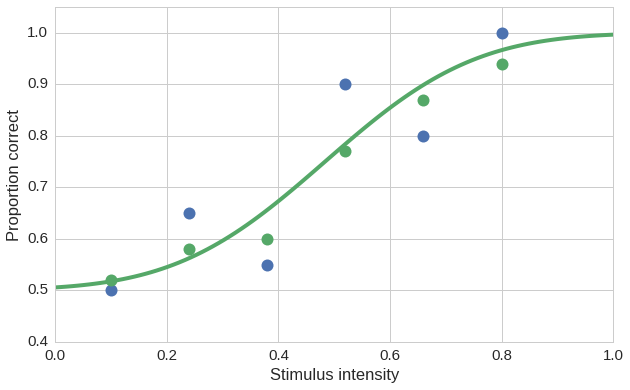

In [70]:
nr_trials = 100
x = linspace(0.1,0.8,6)
perf_data = [0.5,  0.65,  0.55,  0.9,  0.8,  1]
z = multiply(perf_data,nr_trials)
n = tile(nr_trials,len(z))

#Plot observed data (blue dots)
figure(figsize=(10,6))
plot(x, perf_data,'bo',markersize=12);

plt.xlabel('Stimulus intensity');
plt.ylabel('Proportion correct');
plt.axis((0, 1, 0.4, 1.05));

#Run the psignifit command for a maximum-likelihood analysis
results = pypsi.BootstrapInference ( zip(x,z,n), sigmoid = "gauss", core = "ab", priors=("flat","flat","Uniform(0,0.1)"), sample=False)
param_vector = results.estimate;

#Define a theoretical observer
model ={"sigmoid" : "gauss", "core" : "ab", "nafc" : 2} #see psignifit3 website for more information

alpha = param_vector[0]
beta = param_vector[1]
lam = param_vector[2]
simulated_observer = sim_obs.Observer(alpha, beta, lam, **model)

#Simulate a data set based on best-fitting psychometric function and fit a psychometric function to the simulated data
x = linspace(0.1,0.8,6)
data = simulated_observer.DoAnExperiment(x, ntrials=nr_trials)
data = numpy.array(data)
sim_perf = divide(data[:,1],nr_trials)
plot(x,sim_perf,'go',markersize=12);
y = array(sim_perf);
z = multiply(sim_perf,nr_trials)
n = tile(nr_trials,len(z))  

#Compute deviance for the simulated data set
#To do this, we use the predictions generated from the best-fitting psychometric function (i.e., the function for which we want to know the goodness-of-fit, NOT the saturated model)
#and we use the simulated data (as opposed to the empirical data) as the y-values

p = psi(x, alpha, beta, lam) #use the prediction of 
l_emp = sum(y * nr_trials * log(p) + (1-y) * nr_trials * log (1-p))#log likelihood of the best-fitting psychometric function
l_sat = sum(y * nr_trials * log(y) + (1-y) * nr_trials * log (1-y))#log likelihood of the saturated model, i.e., the model for which p=y holds, in other words: the model that predicts the data perfectly
sim_D = 2*(l_sat-l_emp)#log of the likelihood ratio = subtraction of the two log likelihoods
    
plot(x_axis, psi(x_axis, alpha, beta, lam),'g-',linewidth=4);

print "The simulated deviance value is " + str(sim_D)

The previous code segment executes one run of the simulation. To perform the full simulation of 2000 runs, we use pypsignifit. This gives us not one simulated deviance value, but 2000 values:

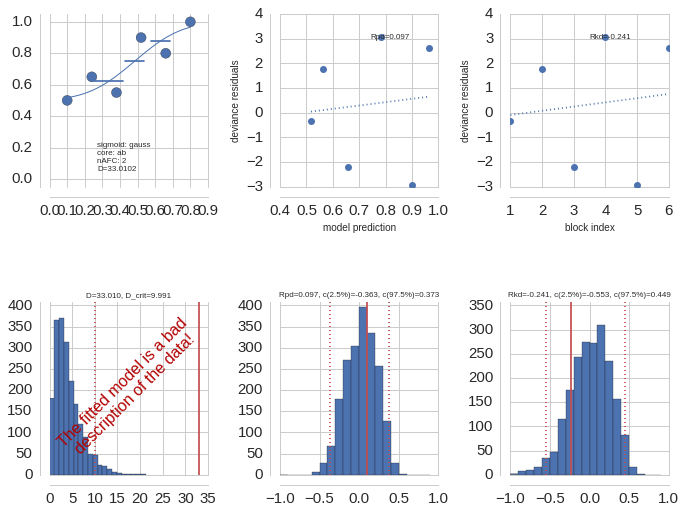

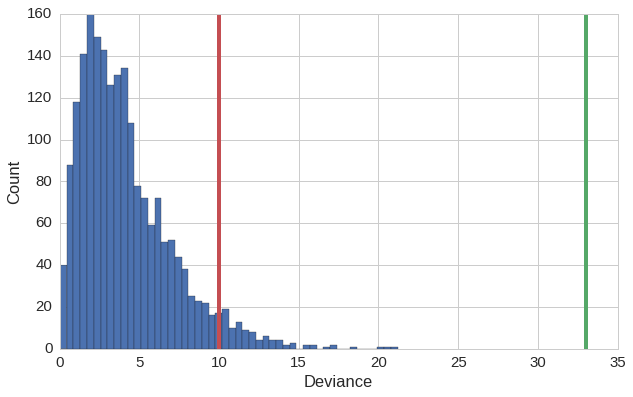

In [71]:
nr_trials = 100

x = linspace(0.1,0.8,6)
perf_data = [0.5,  0.65,  0.55,  0.9,  0.8,  1]
k = multiply(perf_data,nr_trials)
n = tile(nr_trials,len(k))

analysis = pypsi.BootstrapInference ( zip(x,k,n), sigmoid = "gauss", core = "ab", priors=("flat","flat","Uniform(0,0.1)"), sample=False);

#Get the deviance value for the psychometric function under consideration
deviance = analysis.deviance

#Perform the Monte-Carlo simulation
analysis.sample(2000);

#Plot the results of the goodness-of-fit analysis
psiplot.GoodnessOfFit(analysis);

#Plot the distribution of deviance values
figure(figsize=(10,6));
n = hist(analysis.mcdeviance,50);
max_count = amax(n[0])
D_critical = percentile(analysis.mcdeviance,95)
plot([D_critical, D_critical], [0, max_count], 'r-', linewidth=4);
plot([deviance, deviance], [0, max_count], 'g-', linewidth=4);


plt.xlabel('Deviance');
plt.ylabel('Count');


The histogram shows the distribution of the 2000 simulated deviance values. It is important to realise what this distribution means. We start from the best-fitting psychometric function and simulate data assuming binomial variability. 

The deviance values that we obtain via this simulation, are the deviance values expected when 

1. the fitted psychometric function has the correct shape. The psychometric functions fitted to the simulated data have the correct shape, because we simulated the data using that very psychometric function as the generating function
2. fitting a psychometric function in the presence of only binomial variability (we used a binomial random number generator to generate the data sets). 

If the deviance of our original psychometric function (green line) is much larger than the simulated deviance values, we need to conclude that the psychometric function model has to be rejected. 

You'll notice that the deviance of the original psychometric function is larger than 30, while the simulated deviance values are mostly smaller than 10. The 95th percentile is approximately 10. We conclude that the psychometric function fit is bad. The model has to be rejected. 

The reason can be two-fold: referring to point (1) above, the shape of the fitted psychometric function can be wrong. This is not the case in the above example. The data follow the shape of the psychometric function on average, but there seems to be a lot of noise in the data. Thus, the problem has to do with point (2) above, the binomial variability. The amount of noise present in the data is larger than the amount expected when assuming only binomial variability. This situation is called overdispersion.

Of course, in this simulation, we assumed 100 trials per datapoint. You can check whether the psychometric function model can still be rejected when assuming 25 trials per datapoint or lower. 

It turns out the model has to be accepted when assuming 25 trials. The reason is that the amount of binomial variability is larger when only 25 trials are conducted per data point. So, the variability present in the data can be considered "normal" or expected if 25 trials are conducted, but not if 100 trials are conducted. In that case, the large amount of trials leads to a reduction in variability: the data should be reliable when conducting a large amount of trials. If they are not reliable, the assumption of binomial variability should be rejected.

One cause of overdispersion is the presence of an additional noise source (for example, the partipicant is distracted by sounds from outside the lab, the participant is not motivated enough,...).

In the next example, overdispersion has a different cause: non-stationary behavior.

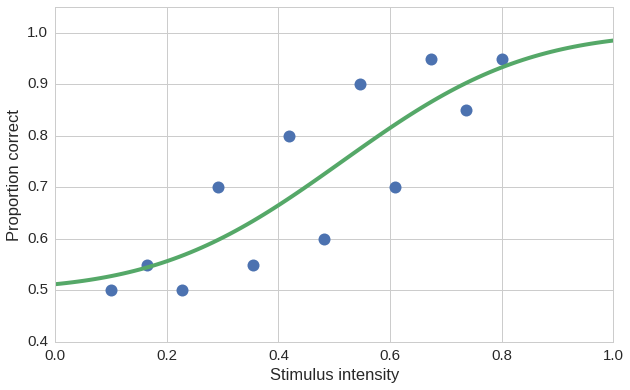

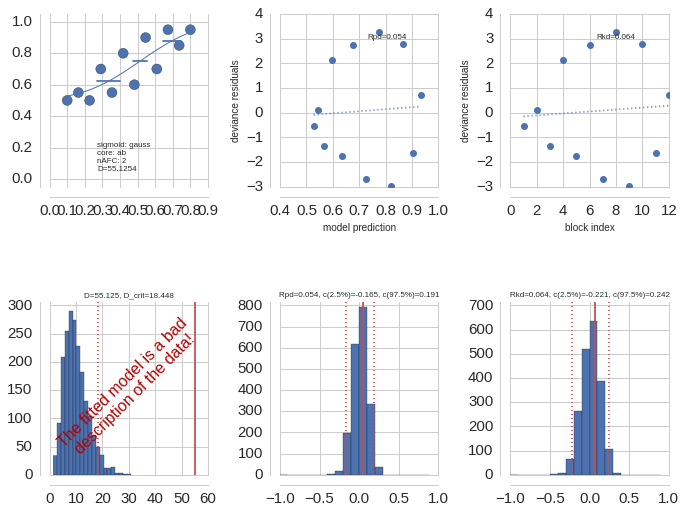

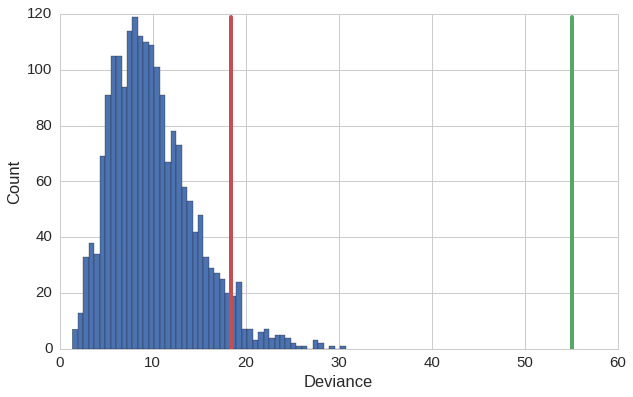

In [72]:
nr_trials = 100

figure(figsize=(10,6));
plt.xlabel('Stimulus intensity');
plt.ylabel('Proportion correct');
plt.axis((0, 1, 0.4, 1.05));


x = linspace(0.1,0.8,12)
perf_data = [0.5,  0.55, 0.5,  0.7, 0.55,  0.8, 0.6,  0.9, 0.7, 0.95,0.85,0.95]
z = multiply(perf_data,nr_trials)
n = tile(nr_trials,len(z))


analysis = pypsi.BootstrapInference ( zip(x,z,n), sigmoid = "gauss", core = "ab", priors=("flat","flat","Uniform(0,0.1)"), sample=False)
param_vector = analysis.estimate
alpha = param_vector[0]
beta = param_vector[1]
lam = param_vector[2]

plot(x, perf_data,'bo',markersize=12);
plot(x_axis, psi(x_axis, alpha, beta, lam),'g-',linewidth=4, label = "Best-fitting PF model");


figure(figsize=(10,6));

deviance = analysis.deviance

analysis.sample(2000);

psiplot.GoodnessOfFit(analysis);

figure(figsize=(10,6));
n = hist(analysis.mcdeviance,50);
max_count = amax(n[0])
D_critical = percentile(analysis.mcdeviance,95)
plot([D_critical, D_critical], [0, max_count], 'r-', linewidth=4);
plot([deviance, deviance], [0, max_count], 'g-', linewidth=4);

plt.xlabel('Deviance');
plt.ylabel('Count');



You can see that fitting the data would require two different psychometric functions: one with a threshold around 0.4 and the other with a threshold of about 0.7. These data indicate non-stationary behavior. For instance, in the beginning of the experiment, the participant is motivated, not tired. Consequently, the performance is good: the threshold is 0.4. Near the end of the experiment, the participant is getting tired. Performance drops and, as a result, the threshold increases to 0.7. To fit the data, we would need to assume two psychometric functions: one for the first half of the experiment, and one for the second half. 

It is clear that these variations are not noise. They are systematic. However, when you fit these data with one single psychometric function, the deviations due to the variation in motivation and tiredness are considered overdispersion: it is variability in addition to binomial variability.

The deviance for the observed dataset is 0.0952514609282
The deviance value corresponding to the 2.5th percentile equals 0.21879663244


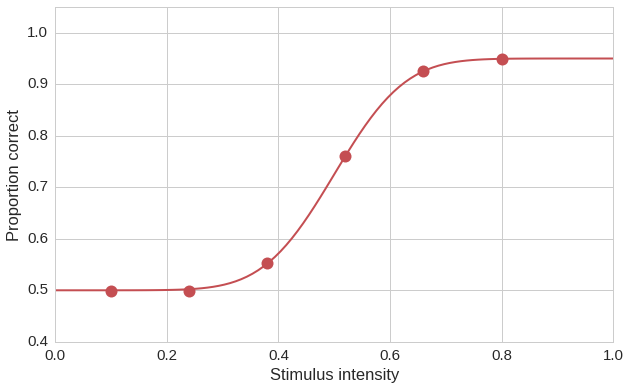

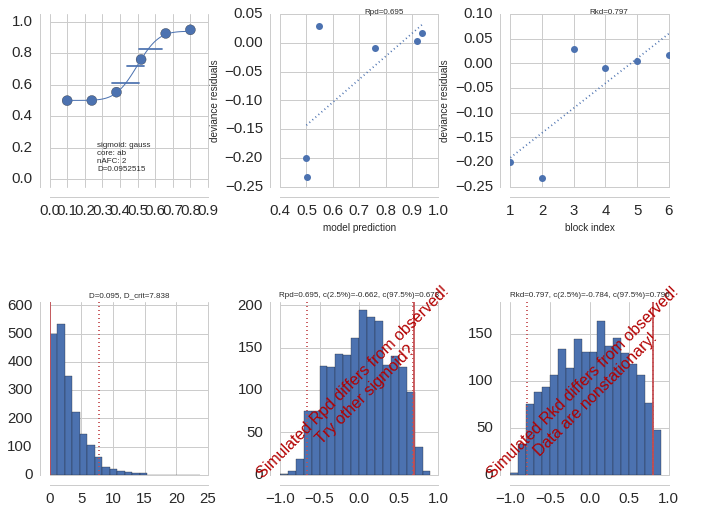

In [73]:
#Parameters defining the red psychometric function
alpha = 0.5
beta = 0.1
lam = 0.05

#Define a theoretical observer
#The responses of this observer are governed by the red psychometric function 
#(parameters alpha, beta, lam) and a binomial process 
model ={"sigmoid" : "gauss", "core" : "ab", "nafc" : 2} #see psignifit3 website for more information

simulated_observer = sim_obs.Observer(alpha, beta, lam, **model)

#Define the stimulus intensities
x_levels = linspace(0.1,0.8,6);

figure(figsize=(10,6))
plt.xlabel('Stimulus intensity');
plt.ylabel('Proportion correct');
plt.axis((0, 1, 0.4, 1.05));

#Simulate data generated by the red psychometric function
data = simulated_observer.DoAnExperiment(x_levels, ntrials=100000)
data = numpy.array(data)
perf_data=data[:,1]/100000
plot(x_levels,perf_data,'ro', markersize=12);
plot(x_axis, psi(x_axis, alpha, beta, lam),'r-',linewidth=2);

nr_trials = 100; #Nr trials assumed for the pypsignifit analysis

x = x_levels
z = multiply(perf_data,nr_trials)
n = tile(nr_trials,len(z))


analysis = pypsi.BootstrapInference ( zip(x,z,n), sigmoid = "gauss", core = "ab", priors=("flat","flat","Uniform(0,0.1)"), sample=False)
analysis.sample(2000);

psiplot.GoodnessOfFit(analysis);

print "The deviance for the observed dataset is " + str(analysis.deviance)
print "The deviance value corresponding to the 2.5th percentile equals " + str(percentile(analysis.mcdeviance,2.5))



The example above shows a dataset for which the psychometric function fit is too good. The goodness-of-fit is too high: when assuming binomial variability and 100 trials per datapoint, it is unlikely that all data points fall exactly on the fitted psychometric function. In other words, there is not enough variability in the data (underdispersion instead of overdispersion). One possibility is that the researcher, clearly having little knowlegde of binomial variability, committed fraud. 





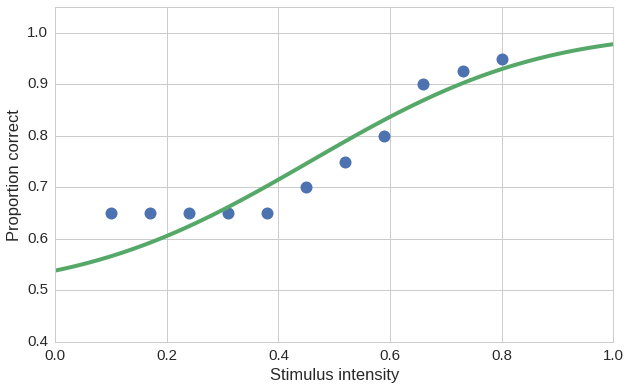

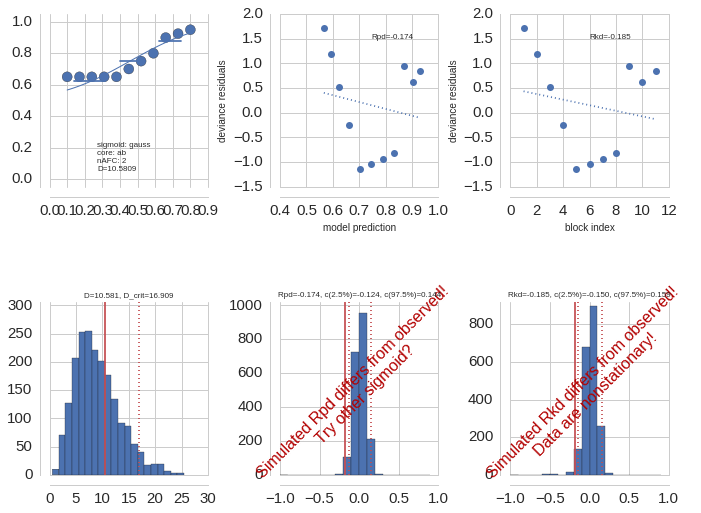

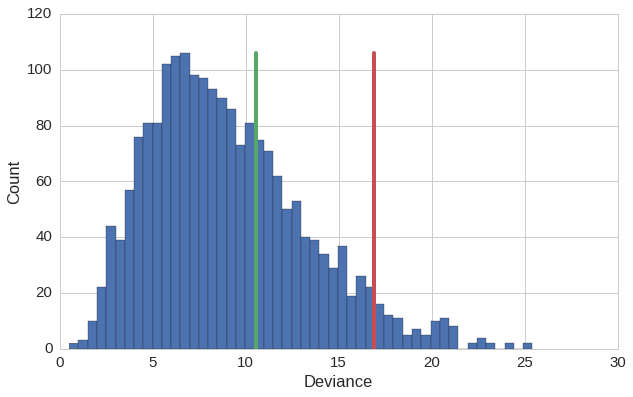

In [74]:
nr_trials = 100

figure(figsize=(10,6));
plt.xlabel('Stimulus intensity');
plt.ylabel('Proportion correct');
plt.axis((0, 1, 0.4, 1.05));


x = linspace(0.1,0.8,11)
x_levels = x
perf_data = [0.65,  0.65,  0.65,  0.65,  0.65, 0.7, 0.75, 0.8, 0.9,0.925,0.95]
z = multiply(perf_data,nr_trials)
n = tile(nr_trials,len(z))


analysis = pypsi.BootstrapInference ( zip(x,z,n), sigmoid = "gauss",\
                                     core = "ab", priors=("flat","flat","Uniform(0,0.1)"), sample=False)
param_vector = analysis.estimate
alpha = param_vector[0]
beta = param_vector[1]
lam = param_vector[2]

plot(x_levels, perf_data,'bo',markersize=12);
plot(x_axis, psi(x_axis, alpha, beta, lam),'g-',linewidth=4, label = "Best-fitting PF model");


figure(figsize=(10,6));

deviance = analysis.deviance

analysis.sample(2000);

psiplot.GoodnessOfFit(analysis);

figure(figsize=(10,6));
n = hist(analysis.mcdeviance,50);
max_count = amax(n[0])
D_critical = percentile(analysis.mcdeviance,95)
plot([D_critical, D_critical], [0, max_count], 'r-', linewidth=4);
plot([deviance, deviance], [0, max_count], 'g-', linewidth=4);

plt.xlabel('Deviance');
plt.ylabel('Count');

Up until now, we have only considered extra-binomial variability as the cause of a bad fit. As mentioned earlier, a low goodness-of-fit can have a second cause: it is possible that the functional form (the shape) of the psychometric function is wrong. This is illustrated in the example above.

Based on the deviance measure, we can conclude that the amount of variability in the data is to be expected when assuming binomial variability.

However, when looking at the data, you can see that we require a psychometric function that saturates at 0.7 instead of 0.5. This is of course just an example: in reality, you will always find a performance of 0.5 (guess rate) when presenting stimuli of intensity 0. Nevertheless, in this case we have a bad fit that was not detected by the deviance statistic. 

Therefore, you should also consider the correlation statistic, $Rpd$. This is the correlation between the residuals (the difference between the data and the psychometric function prediction) and the model prediction. We observe a negative correlation of about -0.17

The statistical significance of this correlation is determined using the same Monte-Carlo simulation as the one used in the deviance analysis:

1. Simulate new datasets using the best-fitting psychometric function model (i.e., the psychometric function under consideration)

2. Compute the correlation measure for each dataset, thereby again using the predictions of the orginal psychometric function but using the simulated data instead of the original empirical data (in contrast, to obtain the correlation of -0.17, we used the predictions of the original psychometric function as well as the empirical data)

This gives you a distribution of correlation values expected when the model is true: i.e., when the data are fitted using a psychometric function that has the appropriate functional form/shape. This makes sense, because the data are simulated using a cumulative Gaussian psychometric function model and then fitted using a cumulative Gaussian psychometric function.

In our example above, the correlation of -0.17 is too negative when assuming that the psychometric function has the appropriate functional form/shape. 




## Obtaining confidence intervals

When the goodness-of-fit of the psychometric function is acceptable, we can use the same Monte-Carlo simulation technique to obtain confidence intervals for the parameters of the psychometric function.

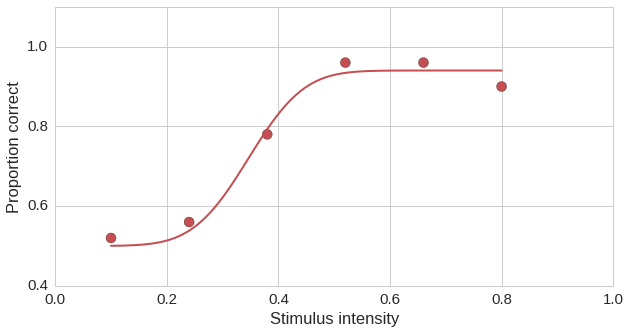

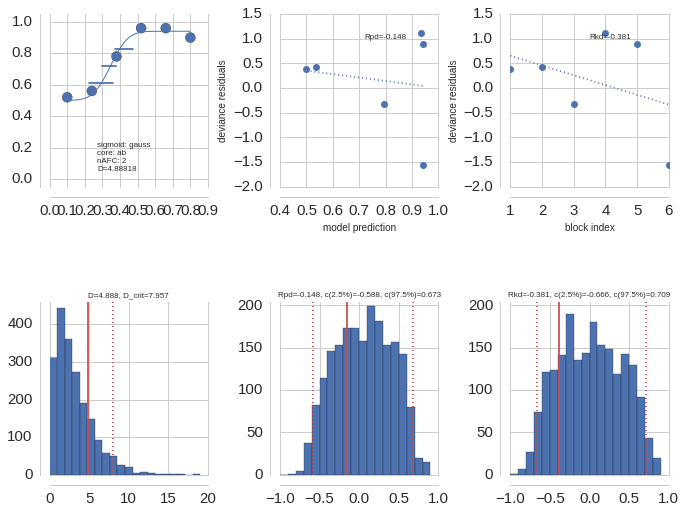

In [75]:
#Specify the data
nr_trials = 100
x = linspace(0.1,0.8,6) 
z = [0.52,  0.57,  0.78,  0.96,  0.96,  0.90]*nr_trials;
n = tile(nr_trials,size(z))

#Run the psignifit command for a maximum-likelihood analysis 
#We use a cumulative Gaussian shape and a linear core
#We use a flat prior for alpha and beta
#For lambda, a uniform prior is used ranging from 0 to 0.1. 
#Typically, datasets requiring lambda > 0.1 signal a problem with the experiment or the participant
#We also provide a cuts vector to indicate the performance levels for which we want a threshold estimate.
#A cut of 0.5 means half-way between the minimum and the maximum of the function, i.e., the 75% correct threshold when lambda = 0
#A cut of 0.25 means 1/4th between the minimum and the maximum of the function

analysis = pypsi.BootstrapInference ( zip(x,z,n), sigmoid = "gauss", core = "ab", priors=("flat","flat","Uniform(0,0.1)"), sample=False, cuts=(0.25,0.5,0.75))
analysis.sample(2000);


figure(figsize=(10,5));
psiplot.plotPMF(analysis, color='r', linewidth=2);
plt.axis((0, 1, 0.4, 1.1));
plt.xlabel('Stimulus intensity')
plt.ylabel('Proportion correct');
psiplot.GoodnessOfFit(analysis);



In [76]:
print analysis.getThres(cut=0.5)
print analysis.getCI(cut=0.5, thres_or_slope="thres")
print analysis.getSlope(cut=0.5)
print analysis.getCI(cut=0.5, thres_or_slope="slope")


0.34650297619
[ 0.29511113  0.37831095]
5.0917747097
[  2.65728653  17.21059296]


The getThres and getSlope provide the threshold and slope estimates (at 75% correct when cut=0.5)
The getCI function provides the 95% confidence intervals for the estimates.

The confidence intervals are generated using the following Monte-Carlo procedure:

1. Obtain the best-fitting psychometric function.

2. Simulate a new data set using this best-fitting function. This new data set will be slightly different from the original data set due to binomial variability (a binomial random number generator is used).

3. Fit a psychometric function to the simulated dataset. Each fit gives you one simulated threshold and slope value.

4. Repeat 2000 or more times.

5. You now have a distribution of 2000 threshold and slope values. The distribution provides the variability expected when assuming binomial variability.

Note that this procedure should not be used when goodness-of-fit is too low:

- the threshold and slope estimates cannot be trusted.

- the model should not be used to simulate new data sets, as the model may be wrong (e.g., there is extra-binomial variability). Neglecting extra-binomial variation leads to an underestimation of the widths of the confidence intervals.




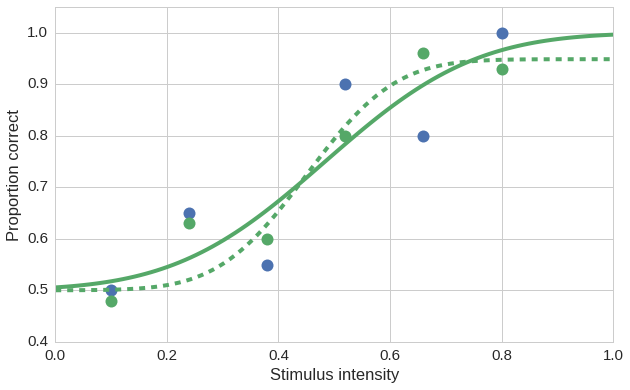

In [77]:
nr_trials = 100
x = linspace(0.1,0.8,6)
perf_data = [0.5,  0.65,  0.55,  0.9,  0.8,  1]
z = multiply(perf_data,nr_trials)
n = tile(nr_trials,len(z))

#Plot observed data (blue dots)
figure(figsize=(10,6))
plot(x, perf_data,'bo',markersize=12);

plt.xlabel('Stimulus intensity');
plt.ylabel('Proportion correct');
plt.axis((0, 1, 0.4, 1.05));

#Run the psignifit command for a maximum-likelihood analysis
results = pypsi.BootstrapInference ( zip(x,z,n), sigmoid = "gauss", core = "ab", priors=("flat","flat","Uniform(0,0.1)"), sample=False)
param_vector = results.estimate;

#Define a theoretical observer
model ={"sigmoid" : "gauss", "core" : "ab", "nafc" : 2} #see psignifit3 website for more information

alpha = param_vector[0]
beta = param_vector[1]
lam = param_vector[2]
simulated_observer = sim_obs.Observer(alpha, beta, lam, **model)

#Simulate data based on best-fitting psychometric function and fit a psychometric function to the simulated data
x = linspace(0.1,0.8,6)
data = simulated_observer.DoAnExperiment(x, ntrials=nr_trials)
data = numpy.array(data)
sim_perf = divide(data[:,1],nr_trials)
plot(x,sim_perf,'go',markersize=12);
z = multiply(sim_perf,nr_trials)
n = tile(nr_trials,len(z))       
results = pypsi.BootstrapInference ( zip(x,z,n), sigmoid = "gauss", core="ab", priors=("flat","flat","Uniform(0,0.1)"), sample=False )
param_vector = results.estimate;
plot(x_axis, psi(x_axis, param_vector[0],param_vector[1],param_vector[2]), 'g--', linewidth=4);
    
    
plot(x_axis, psi(x_axis, alpha, beta, lam),'g-',linewidth=4);

Here we see the result of one run of the Monte-Carlo simulation. The psychometric function (dotted green line) fitted to the simulated data (green dots) differs somewhat from the original function (full green line). The 75%-correct threshold will thus be slightly different from the original threshold. This difference is due to the binomial variability assumed in the model and simulation. 

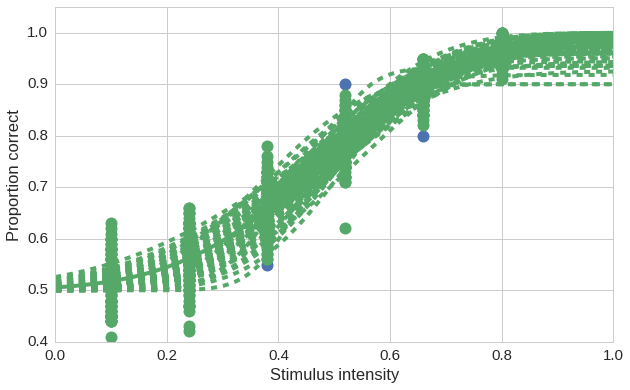

In [78]:
nr_trials = 100
x = linspace(0.1,0.8,6)
perf_data = [0.5,  0.65,  0.55,  0.9,  0.8,  1]
z = multiply(perf_data,nr_trials)
n = tile(nr_trials,len(z))

#Plot observed data (blue dots)
figure(figsize=(10,6))
plot(x, perf_data,'bo',markersize=12);

plt.xlabel('Stimulus intensity');
plt.ylabel('Proportion correct');
plt.axis((0, 1, 0.4, 1.05));

#Run the psignifit command for a maximum-likelihood analysis
results = pypsi.BootstrapInference ( zip(x,z,n), sigmoid = "gauss", \
                                    core = "ab", priors=("flat","flat","Uniform(0,0.1)"), sample=False)
param_vector = results.estimate;

#Define a theoretical observer
model ={"sigmoid" : "gauss", "core" : "ab", "nafc" : 2} #see psignifit3 website for more information

alpha = param_vector[0]
beta = param_vector[1]
lam = param_vector[2]
simulated_observer = sim_obs.Observer(alpha, beta, lam, **model)

#Simulate data based on best-fitting psychometric function 
#and fit a psychometric function to the simulated data
#Repeat this 100 times.
sim_deviance_values = zeros(shape=(100,1))

for i in range(1, 100):
    x = linspace(0.1,0.8,6)
    data = simulated_observer.DoAnExperiment(x, ntrials=nr_trials)
    data = numpy.array(data)
    sim_perf = divide(data[:,1],nr_trials)
    plot(x,sim_perf,'go',markersize=12);
    z = multiply(sim_perf,nr_trials)
    n = tile(nr_trials,len(z))       
    results = pypsi.BootstrapInference ( zip(x,z,n), sigmoid = "gauss",\
                                        core="ab", priors=("flat","flat","Uniform(0,0.1)"), sample=False )
    param_vector = results.estimate;
    sim_deviance_values[i]=results.deviance;
    plot(x_axis, psi(x_axis, param_vector[0],param_vector[1],param_vector[2]), 'g--', linewidth=4);
    
    
plot(x_axis, psi(x_axis, alpha, beta, lam),'g-',linewidth=4);


Here, the results of 100 runs are shown, giving a good idea of the variability in the 75%-correct threshold due to binomial variability. A threshold value of 0.45 will definitely be included in the confidence interval, but 0.6 will not.  

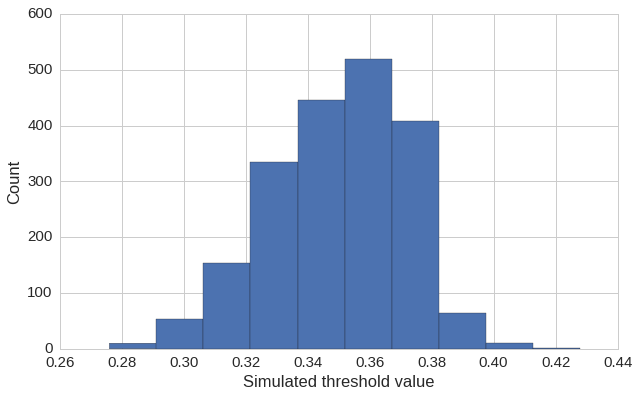

In [79]:
#Get the simulated threshold values
sim_thresholds = analysis.mcthres;
#Sim_tresholds contains 3 columns. Column index 0 (the first column) corresponds to cut=0.25, index 1 (second column) to cut=0.5, index 2 (third column) to cut=0.75. 

figure(figsize=(10,6));
hist(sim_thresholds[:,1]); #Here, we select the second column (index 1)
plt.xlabel('Simulated threshold value');
plt.ylabel('Count');

You can obtain the threshold values simulated using the Monte-Carlo simulation via the analysis.mcthres matrix